# 그래프 그리기

## 데이터 세트 로드

In [9]:
from sklearn import datasets

iris = datasets.load_iris()
data = iris.data[:,[1,3]]
labels = iris.target

print(f"data : {data}")

data : [[3.5 0.2]
 [3.  0.2]
 [3.2 0.2]
 [3.1 0.2]
 [3.6 0.2]
 [3.9 0.4]
 [3.4 0.3]
 [3.4 0.2]
 [2.9 0.2]
 [3.1 0.1]
 [3.7 0.2]
 [3.4 0.2]
 [3.  0.1]
 [3.  0.1]
 [4.  0.2]
 [4.4 0.4]
 [3.9 0.4]
 [3.5 0.3]
 [3.8 0.3]
 [3.8 0.3]
 [3.4 0.2]
 [3.7 0.4]
 [3.6 0.2]
 [3.3 0.5]
 [3.4 0.2]
 [3.  0.2]
 [3.4 0.4]
 [3.5 0.2]
 [3.4 0.2]
 [3.2 0.2]
 [3.1 0.2]
 [3.4 0.4]
 [4.1 0.1]
 [4.2 0.2]
 [3.1 0.2]
 [3.2 0.2]
 [3.5 0.2]
 [3.6 0.1]
 [3.  0.2]
 [3.4 0.2]
 [3.5 0.3]
 [2.3 0.3]
 [3.2 0.2]
 [3.5 0.6]
 [3.8 0.4]
 [3.  0.3]
 [3.8 0.2]
 [3.2 0.2]
 [3.7 0.2]
 [3.3 0.2]
 [3.2 1.4]
 [3.2 1.5]
 [3.1 1.5]
 [2.3 1.3]
 [2.8 1.5]
 [2.8 1.3]
 [3.3 1.6]
 [2.4 1. ]
 [2.9 1.3]
 [2.7 1.4]
 [2.  1. ]
 [3.  1.5]
 [2.2 1. ]
 [2.9 1.4]
 [2.9 1.3]
 [3.1 1.4]
 [3.  1.5]
 [2.7 1. ]
 [2.2 1.5]
 [2.5 1.1]
 [3.2 1.8]
 [2.8 1.3]
 [2.5 1.5]
 [2.8 1.2]
 [2.9 1.3]
 [3.  1.4]
 [2.8 1.4]
 [3.  1.7]
 [2.9 1.5]
 [2.6 1. ]
 [2.4 1.1]
 [2.4 1. ]
 [2.7 1.2]
 [2.7 1.6]
 [3.  1.5]
 [3.4 1.6]
 [3.1 1.5]
 [2.3 1.3]
 [3.  1.3]
 [2.5 1.3]
 [2

In [10]:
import matplotlib
from matplotlib import font_manager, rc

# 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 예: Windows의 맑은 고딕 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font_name)

C:\Users\maum.ai\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


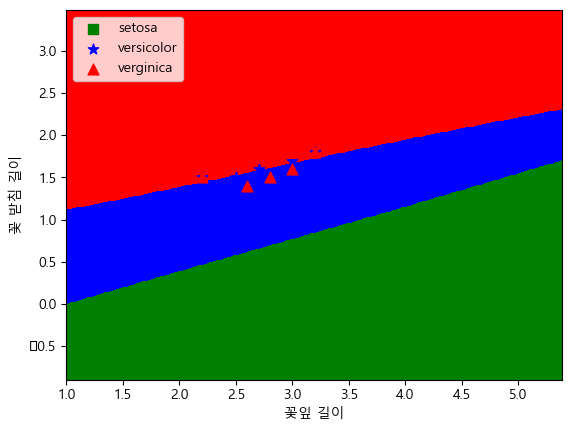

In [11]:
import numpy
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

markers = ('s','*','^')

colors= ('green','blue','red')

cmap = ListedColormap(colors)

x_min, x_max = data[:,0].min() - 1, data[:,0].max() + 1
y_min, y_max = data[:,1].min() - 1, data[:,1].max() + 1
resoultion = 0.01
x, y = numpy.meshgrid(
    numpy.arange(x_min,x_max,resoultion),
    numpy.arange(y_min,y_max,resoultion)
)

from sklearn.neural_network._multilayer_perceptron import MLPClassifier
mlp = MLPClassifier(random_state=1,max_iter=1000)

mlp.fit(data,labels)

z = mlp.predict(
    numpy.array(
        [x.ravel(),y.ravel()]
    ).T
)

z = z.reshape(x.shape)

plt.pcolormesh(x,y,z,cmap=cmap)
plt.xlim(x.min(),x.max())
plt.ylim(y.min(),y.max())


classes = ["setosa", "versicolor", "verginica"]

for index,cl in enumerate(numpy.unique(labels)):
    plt.scatter(data[labels == cl, 0], data[labels == cl, 1], color=cmap(index), marker=markers[index],s=60,label=classes[index],edgecolors='black')

plt.xlabel("꽃잎 길이")
plt.ylabel("꽃 받침 길이")

plt.legend(loc='upper left')

plt.show()